<a href="https://colab.research.google.com/github/mateuszklinowski/biologicallyInspiredAlgorithms/blob/master/Regresja_liniowa_WSB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import sklearn 

In [0]:
age = [18,19,20,21,22,23,24,25,26,27,28,29];
height = [76.1,77,78.1,78.2,78.8,79.7,79.9,81.1,81.2,81.8,82.8,83.5]

#Podejscie z zajec


In [0]:
import pandas as pd
import numpy as np


x = age
y = height

x_train = np.array(x)
y_train = np.array(y)
x_train_t = np.array(x).reshape(-1,1)

In [0]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

clf = LinearRegression(normalize=True)
res = clf.fit(x_train_t,y_train)
y_pred = clf.predict(x_train_t)
print(r2_score(y_train,y_pred))

0.988763937143289


In [0]:
# Obliczenie tego "recznie"

n = len(y_train);

b_1_counter = (np.sum(x_train * y_train)) - ((np.sum(x_train) * (np.sum(y_train))/n));
b_1_denominator = ( np.sum(x_train**2) - (np.sum(x_train)**2)/n)

b_1 = b_1_counter/b_1_denominator;
b_0 = np.average(y_train) -  b_1 * np.average(x_train)

print("b0 -> ", b_0);
print("b2 -> ", b_1);


b0 ->  64.9283216783212
b2 ->  0.6349650349650553


MSE dla recznie obliczonych wartosci

In [0]:
y_pred_manual = b_0 + b_1 * x_train.reshape(-1,1);
error_manual = y_pred_manual - y_train.reshape(-1,1);
MSE_manual = np.sum(error_manual**2)/ len(y_pred_manual);

y_pred_lin = clf.predict(x_train_t)
error_lib = y_pred_lin - y_train;
MSE_lib = np.sum(error_lib**2)/ len(y_pred_lin);

y_pred_ml = a_0 + a_1 * x_train.reshape(-1,1);
error_ml = y_pred_ml - y_train.reshape(-1,1);
MSE_ml = np.sum(error_ml**2)/ len(y_pred_ml);

print('Manual MSE -> ', MSE_manual);
print('Lib MSE -> ', MSE_lib);
print('ML MSE -> ', MSE_ml);

Manual MSE ->  0.05459790209790177
Lib MSE ->  0.05459790209790142
ML MSE ->  88.64560837566371


# Gradient descent

In [0]:
#Setup variables
n = len(y_pred);
lerning_rate = 0.001;

limit = 1000000;

a_0 = np.zeros((n,1))
a_1 = np.zeros((n,1))
y_train.shape

(12,)

In [0]:
# Obliczenie "recznie" uzywając metod ML

epochs = 0;
while epochs < limit:
  y_pred = a_0 + a_1 * x_train_t
  error = y_pred - y_train.reshape(-1,1)
  MSE = np.sum(error**2) / n

  prev_a = a_0;
  a_0 = a_0 - lerning_rate * (2/n) * np.sum(error) 
  a_1 = a_1 - lerning_rate * (2/n) * np.sum(error * x_train_t)

  if(epochs%1000 == 0):
    #lerning_rate = lerning_rate * 0.95;
    print(MSE)
  
  if abs(prev_a[0][0] - a_0[0][0]) < 0.000000000000001:
    break;

  epochs += 1;

#print(a_0[0])
#print(a_1[0])

0.05459790209790082


In [0]:
error

array([[ 0.25769231],
       [-0.00734266],
       [-0.47237762],
       [ 0.06258741],
       [ 0.09755245],
       [-0.16748252],
       [ 0.26748252],
       [-0.29755245],
       [ 0.23741259],
       [ 0.27237762],
       [-0.09265734],
       [-0.15769231]])

#Wykres danych

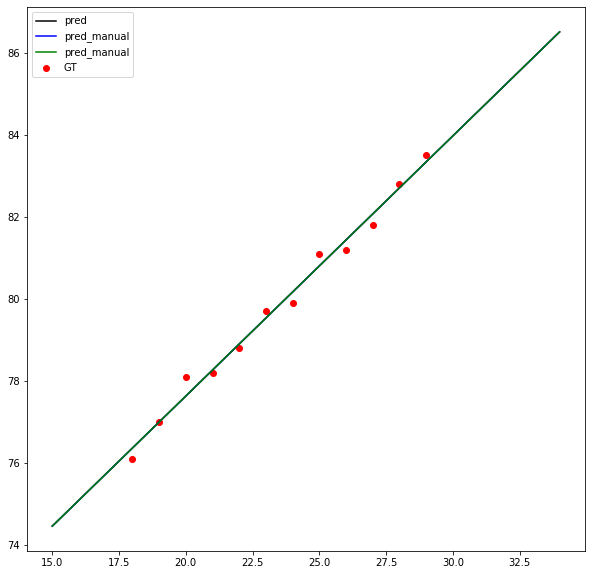

In [0]:
import matplotlib.pyplot as plt 

y_plot_lib = []
y_plot_manual = []
y_plot_ml = []
for i in range(15,35):
    y_plot_lib.append(clf.predict(np.array([i]).reshape(-1,1)))
    y_plot_manual.append(b_0 + b_1 * i)
    y_plot_ml.append(a_0[0][0] + a_1[0][0] * i)
plt.figure(figsize=(10,10))
plt.scatter(age,height,color='red',label='GT')
plt.plot(range(15,35),y_plot_lib,color='black',label = 'pred')
plt.plot(range(15,35),y_plot_manual,color='blue',label = 'pred_manual')
plt.plot(range(15,35),y_plot_ml,color='green',label = 'pred_manual')
plt.legend()
plt.show()